In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
from get_data import get_req_data
import get_tickers
import yahooquery as yq
from datetime import date
from dateutil.relativedelta import relativedelta

In [4]:
# Param configuration
start_date = "2015-01-08"
end_date = "2015-01-15"

pd.set_option('display.max_rows', 20)

#Sector Map
sector_map = {
'S&P 500 Materials (Sector)' : 'basic_materials', 
'S&P 500 Industrials (Sector)' : 'industrials',
'S&P 500 Consumer Discretionary (Sector)' : 'consumer_cyclical' ,
'S&P 500 Consumer Staples (Sector)' : 'consumer_defensive',
'S&P 500 Health Care (Sector)' : 'healthcare', 
'S&P 500 Financials (Sector)' : 'financial_services',
'S&P 500 Information Technology (Sector)' : 'technology',
'S&P 500 Telecommunication Services (Sector)' : 'communication_services',
'S&P 500 Utilities (Sector)' : 'utilities', 
'S&P 500 Real Estate (Sector)' : 'realestate',
'S&P 500 Energy (Sector)' : 'energy'
}


In [5]:
# get_tickers.main()

In [6]:
yf.download("^GSPE", start=start_date, end=end_date, progress=False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-07,558.190002,567.229980,556.309998,560.090027,560.090027,0
2015-01-08,560.090027,572.780029,560.090027,572.440002,572.440002,0
2015-01-09,572.440002,573.210022,562.909973,567.919983,567.919983,0
2015-01-12,567.919983,567.919983,549.299988,552.000000,552.000000,0
2015-01-13,552.000000,558.109985,542.820007,547.989990,547.989990,0
2015-01-14,547.989990,549.599976,533.630005,548.679993,548.679993,0


In [7]:
get_req_data(start_date, end_date).keys()

dict_keys(['S&P 500 Materials (Sector)', 'S&P 500 Industrials (Sector)', 'S&P 500 Consumer Discretionary (Sector)', 'S&P 500 Consumer Staples (Sector)', 'S&P 500 Health Care (Sector)', 'S&P 500 Financials (Sector)', 'S&P 500 Information Technology (Sector)', 'S&P 500 Telecommunication Services (Sector)', 'S&P 500 Utilities (Sector)', 'S&P 500 Real Estate (Sector)', 'S&P 500 Energy (Sector)'])

In [8]:
# Generate data frame to hold all required information
sectors_ticker = "SPY"

# Load in info
sp500_tickers_data = get_req_data(start_date, end_date)
weights = yq.Ticker(sectors_ticker).fund_sector_weightings.to_dict()

# add the sectors + dates + adj close to the dataframe
records = []
for sector, data in sp500_tickers_data.items():
    for x in range(0, len(data['sector_data'])):

        record = {"sector" : sector, "date" : data['sector_data'].index[x], "adj_close" : data["sector_data"][x], "sector_weight" : weights[sectors_ticker][sector_map[sector]] }
        records.append(record)

df = pd.DataFrame(records)

df["pct_change"] = df.groupby("sector")["adj_close"].pct_change()

df["contribution"] = df["pct_change"] * df["sector_weight"]

print(weights)
display(df)


{'SPY': {'realestate': 0.028399998, 'consumer_cyclical': 0.111899994, 'basic_materials': 0.0225, 'consumer_defensive': 0.0717, 'technology': 0.2464, 'communication_services': 0.084, 'financial_services': 0.1299, 'utilities': 0.024500001, 'industrials': 0.0846, 'energy': 0.0466, 'healthcare': 0.14130001}}


,sector,date,adj_close,sector_weight,pct_change,contribution
0,S&P 500 Materials (Sector),2015-01-07,298.519989,0.0225,NaN,NaN
1,S&P 500 Materials (Sector),2015-01-08,305.600006,0.0225,0.023717,0.000534
2,S&P 500 Materials (Sector),2015-01-09,304.070007,0.0225,-0.005007,-0.000113
3,S&P 500 Materials (Sector),2015-01-12,303.130005,0.0225,-0.003091,-0.000070
4,S&P 500 Materials (Sector),2015-01-13,299.609985,0.0225,-0.011612,-0.000261
...,...,...,...,...,...,...
61,S&P 500 Energy (Sector),2015-01-08,572.440002,0.0466,0.022050,0.001028
62,S&P 500 Energy (Sector),2015-01-09,567.919983,0.0466,-0.007896,-0.000368
63,S&P 500 Energy (Sector),2015-01-12,552.000000,0.0466,-0.028032,-0.001306
64,S&P 500 Energy (Sector),2015-01-13,547.989990,0.0466,-0.007265,-0.000339


In [9]:
contributions = df.groupby("sector").agg({"contribution": "sum"})
contributions["contribution_as_pct"] = (contributions["contribution"] / df["contribution"].sum())*100
contributions

,contribution,contribution_as_pct
sector,,
S&P 500 Consumer Discretionary (Sector),-0.001564,37.842019
S&P 500 Consumer Staples (Sector),0.000062,-1.511367
S&P 500 Energy (Sector),-0.000927,22.418232
S&P 500 Financials (Sector),-0.003206,77.561768
S&P 500 Health Care (Sector),0.000367,-8.873881
S&P 500 Industrials (Sector),-0.000443,10.707686
S&P 500 Information Technology (Sector),0.000126,-3.049440
S&P 500 Materials (Sector),-0.000177,4.287142
S&P 500 Real Estate (Sector),0.000412,-9.959582


In [5]:
# weights

In [6]:
# yq.Ticker(sectors_ticker).fund_sector_weightings.SPY.sum()

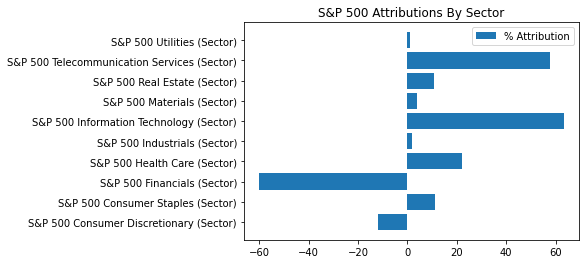

In [7]:
# Starting with visualisation:
import matplotlib.pyplot as plt
fig=plt.figure(1)
plt.barh(contributions.index, contributions["contribution_as_pct"],align="center")


plt.title("S&P 500 Attributions By Sector")
plt.legend(labels=["% Attribution"])
plt.show()

In [8]:
contributions_test = contributions.copy()
contributions_test.iloc[-1][1] = 100

<ipython-input-8-0c8e544b13dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contributions_test.iloc[-1][1] = 100


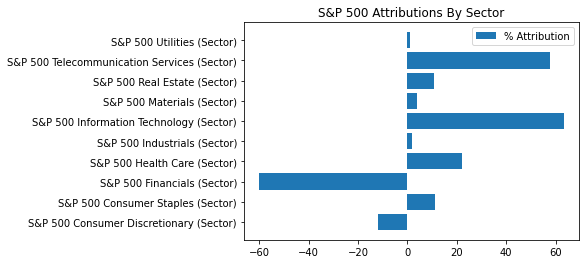

In [9]:
fig=plt.figure(1)
plt.barh(contributions_test.index, contributions_test["contribution_as_pct"],align="center")


plt.title("S&P 500 Attributions By Sector")
plt.legend(labels=["% Attribution"])
plt.show()

# Denzel: Printing individual time dataframe

So we need:

- MTD
- QTD
- YTD
- 3m
- 6m
- 1y
- 3y
- 5y
- 10y
- all

In [10]:
# Frist lets package everything into a nice little function.

def cont(start_date, end_date):# format like 2015-01-15 (YYYY-MM-DD)
    
    # Generate data frame to hold all required information
    sectors_ticker = "SPY"

    # Load in info
    sp500_tickers_data = get_req_data(start_date, end_date)
    weights = yq.Ticker(sectors_ticker).fund_sector_weightings.to_dict()

    # add the sectors + dates + adj close to the dataframe
    records = []
    for sector, data in sp500_tickers_data.items():
        for x in range(0, len(data['sector_data'])):

            record = {"sector" : sector, "date" : data['sector_data'].index[x], "adj_close" : data["sector_data"][x], "sector_weight" : weights[sectors_ticker][sector_map[sector]] }
            records.append(record)

    df = pd.DataFrame(records)

    df["pct_change"] = df.groupby("sector")["adj_close"].pct_change()

    df["contribution"] = df["pct_change"] * df["sector_weight"]

    #print(weights)
    #display(df)

    contributions = df.groupby("sector").agg({"contribution": "sum"})
    contributions["contribution_as_pct"] = (contributions["contribution"] / df["contribution"].sum())*100

    return contributions


    

In [11]:
cont("2000-1-1", date.today())

,contribution,contribution_as_pct
sector,,
S&P 500 Consumer Discretionary (Sector),0.215921,14.511073
S&P 500 Consumer Staples (Sector),0.108557,7.295626
S&P 500 Financials (Sector),0.194997,13.104896
S&P 500 Health Care (Sector),0.262609,17.648727
S&P 500 Industrials (Sector),0.128200,8.615765
S&P 500 Information Technology (Sector),0.456783,30.698334
S&P 500 Materials (Sector),0.037743,2.536508
S&P 500 Real Estate (Sector),0.053863,3.619873
S&P 500 Telecommunication Services (Sector),-0.005051,-0.339454


### The Building begins...

In [12]:
# MTD Builder
mtd_start = "{year}-{month}-1"

cur_month = date.today().month
cur_year = date.today().year

mtd_start_date = mtd_start.format(year=cur_year, month=cur_month)

mtd_end_date = date.today()

# Printing result
#print(mtd_start_date,mtd_end_date)
cont(mtd_start_date, mtd_end_date)

,contribution,contribution_as_pct
sector,,
S&P 500 Consumer Discretionary (Sector),-0.006361,10.582641
S&P 500 Consumer Staples (Sector),-0.003251,5.408498
S&P 500 Financials (Sector),-0.007291,12.129893
S&P 500 Health Care (Sector),-0.001763,2.933285
S&P 500 Industrials (Sector),-0.007262,12.081431
S&P 500 Information Technology (Sector),-0.020427,33.983301
S&P 500 Materials (Sector),-0.002051,3.412033
S&P 500 Real Estate (Sector),-0.002962,4.927104
S&P 500 Telecommunication Services (Sector),-0.008039,13.374291


In [13]:
#QTD builder

cm = date.today().month

if cm >= 1 and cm <= 3:
    qtd_start_date = str(date.today().year) + "-1-1" #Q1
elif cm >= 4 and cm <= 6:
    qtd_start_date = str(date.today().year) + "-4-1" #Q2
elif cm >= 7 and cm <= 9:
    qtd_start_date = str(date.today().year) + "-7-1" #Q3
elif cm >= 10 and cm <= 12:
    qtd_start_date = str(date.today().year) + "-10-1" #Q4
else:
    print("Error")
    
    
qtd_end_date = date.today()

#Printing Result
print(qtd_start_date,qtd_end_date)
cont(qtd_start_date,qtd_end_date)

2022-7-1 2022-09-25


,contribution,contribution_as_pct
sector,,
S&P 500 Consumer Discretionary (Sector),0.008464,-49.208977
S&P 500 Consumer Staples (Sector),-0.002307,13.411409
S&P 500 Financials (Sector),-0.000853,4.959073
S&P 500 Health Care (Sector),-0.005586,32.477621
S&P 500 Industrials (Sector),-0.001969,11.450021
S&P 500 Information Technology (Sector),-0.003767,21.901848
S&P 500 Materials (Sector),-0.001479,8.597392
S&P 500 Real Estate (Sector),-0.002227,12.948153
S&P 500 Telecommunication Services (Sector),-0.008144,47.348808


In [14]:
# YTD Builder

ytd_start_date = str(date.today().year) + "-1-1"
ytd_end_date = date.today()

print(ytd_start_date,ytd_end_date)
cont(ytd_start_date,ytd_end_date)

2022-1-1 2022-09-25


,contribution,contribution_as_pct
sector,,
S&P 500 Consumer Discretionary (Sector),-0.032407,14.339030
S&P 500 Consumer Staples (Sector),-0.006692,2.960789
S&P 500 Financials (Sector),-0.026914,11.908472
S&P 500 Health Care (Sector),-0.017658,7.813284
S&P 500 Industrials (Sector),-0.017261,7.637274
S&P 500 Information Technology (Sector),-0.074725,33.063481
S&P 500 Materials (Sector),-0.005786,2.560299
S&P 500 Real Estate (Sector),-0.008566,3.790218
S&P 500 Telecommunication Services (Sector),-0.036391,16.101915


In [15]:
#3M
cont(date.today() + relativedelta(months=-3), date.today())
#6M
cont(date.today() + relativedelta(months=-6), date.today())
#1y
cont(date.today() + relativedelta(years=-1), date.today())
#3y
cont(date.today() + relativedelta(years=-3), date.today())
#5y
cont(date.today() + relativedelta(years=-5), date.today())
#10y
cont(date.today() + relativedelta(years=-10), date.today())
#ALL
cont("1928-1-2", date.today()) #idk about this one... Seems too low for a 90+ year gap.

,contribution,contribution_as_pct
sector,,
S&P 500 Consumer Discretionary (Sector),0.348536,11.989919
S&P 500 Consumer Staples (Sector),0.175475,6.036483
S&P 500 Financials (Sector),0.357359,12.293440
S&P 500 Health Care (Sector),0.460778,15.851140
S&P 500 Industrials (Sector),0.223963,7.704510
S&P 500 Information Technology (Sector),1.096970,37.736652
S&P 500 Materials (Sector),0.052621,1.810213
S&P 500 Real Estate (Sector),0.053863,1.852924
S&P 500 Telecommunication Services (Sector),0.098315,3.382108


In [16]:
result = cont("2000-1-1", date.today())
result

,contribution,contribution_as_pct
sector,,
S&P 500 Consumer Discretionary (Sector),0.215921,14.511073
S&P 500 Consumer Staples (Sector),0.108557,7.295626
S&P 500 Financials (Sector),0.194997,13.104896
S&P 500 Health Care (Sector),0.262609,17.648727
S&P 500 Industrials (Sector),0.128200,8.615765
S&P 500 Information Technology (Sector),0.456783,30.698333
S&P 500 Materials (Sector),0.037743,2.536508
S&P 500 Real Estate (Sector),0.053863,3.619873
S&P 500 Telecommunication Services (Sector),-0.005051,-0.339454


In [17]:

###

#result_df["Portfolio [%]"] = # INSERT PORTFOLIO ATTRIBUTIONS HERE!!!


###

In [21]:
# NEW (Slightly editied) function that returns in desired output Dataframe 

def cont2(start_date, end_date):# format like 2015-01-15 (YYYY-MM-DD)
    
    # Generate data frame to hold all required information
    sectors_ticker = "SPY"

    # Load in info
    sp500_tickers_data = get_req_data(start_date, end_date)
    weights = yq.Ticker(sectors_ticker).fund_sector_weightings.to_dict()

    # add the sectors + dates + adj close to the dataframe
    records = []
    for sector, data in sp500_tickers_data.items():
        for x in range(0, len(data['sector_data'])):

            record = {"sector" : sector, "date" : data['sector_data'].index[x], "adj_close" : data["sector_data"][x], "sector_weight" : weights[sectors_ticker][sector_map[sector]] }
            records.append(record)

    df = pd.DataFrame(records)

    df["pct_change"] = df.groupby("sector")["adj_close"].pct_change()

    df["contribution"] = df["pct_change"] * df["sector_weight"]

    #print(weights)
    #display(df)

    contributions = df.groupby("sector").agg({"contribution": "sum"})
    contributions["contribution_as_pct"] = (contributions["contribution"] / df["contribution"].sum())*100
    
    # We standardize output DF form here
    result_df = contributions.loc[:,contributions.columns != "contribution"]
    
    result_df.rename(columns={"contribution_as_pct":"S&P 500 [%]"}, inplace=True)
    
    # result_df["Portfolio [%]"] =  #[INSERT PORTFOLIO ATTRIBUTIONS HERE!!!]

    return result_df


    

In [22]:
cont2('2010-1-1',date.today())

/Users/denzelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,S&P 500 [%]
sector,
S&P 500 Consumer Discretionary (Sector),14.389337
S&P 500 Consumer Staples (Sector),5.496126
S&P 500 Financials (Sector),11.992100
S&P 500 Health Care (Sector),15.305764
S&P 500 Industrials (Sector),7.898392
S&P 500 Information Technology (Sector),35.578031
S&P 500 Materials (Sector),1.661224
S&P 500 Real Estate (Sector),2.367129
S&P 500 Telecommunication Services (Sector),3.540920


In [23]:
sp500_tickers_data = get_req_data('2010-1-1',date.today())

In [24]:
sp500_tickers_data

{'S&P 500 Materials (Sector)': {'sector_data': Date
  2009-12-31    199.809998
  2010-01-04    205.360001
  2010-01-05    206.429993
  2010-01-06    209.570007
  2010-01-07    208.610001
                   ...    
  2022-09-16    456.820007
  2022-09-19    464.260010
  2022-09-20    455.450012
  2022-09-21    445.450012
  2022-09-23    430.899994
  Name: Adj Close, Length: 3201, dtype: float64},
 'S&P 500 Industrials (Sector)': {'sector_data': Date
  2009-12-31    242.990005
  2010-01-04    247.110001
  2010-01-05    247.990005
  2010-01-06    248.490005
  2010-01-07    251.720001
                   ...    
  2022-09-19    761.789978
  2022-09-20    752.380005
  2022-09-21    742.320007
  2022-09-22    731.270020
  2022-09-23    717.599976
  Name: Adj Close, Length: 3202, dtype: float64},
 'S&P 500 Consumer Discretionary (Sector)': {'sector_data': Date
  2009-12-31     235.070007
  2010-01-04     236.460007
  2010-01-05     237.619995
  2010-01-06     237.589996
  2010-01-07     239.63